# Quick and Easy Technical Analysis Project for Beginners Using Yahoo Finance with Python



# Project Objectives: 

1. Explore the available stock data for 4 stocks of your choice over the last three years, and observe any patterns or trends.
2. Calculate Market Capitalization, Moving Averages, Volatility and Stability.
3. Find correlations among the variables of the dataset.
4. Determine which of the stocks would be a better option for stock trading.

## Please Note: 

*This project is only meant for practice. Please do not consider this project to be a complete and reliable implementation for real-world analysis.*
## Step 1: Import the Libraries and Data

Run the following code cells to import the required libraries and the data. 

In [3]:
# Run this code cell to import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from pandas.plotting import scatter_matrix


You can download the necessary data from 'Yahoo Finance'. You can choose any set of 4 stocks that you would like to work with, along with any time period. 

Here, we will be working with **Apple, Amazon, Ford, and Cisco**. 
The time period is from **17th August 2019 to 17th August 2022**.


In [5]:
# Define start and end dates, then import data from yahoo finance for each required stock.
# For now, we will consider Apple (AAPL), Amazon (AMZN), Ford (F), and Cisco (CSCO).
# At the time of writing this code, Amazon and Cisco stocks are gaining, while Apple and Ford are dropping.

start = "2021-08-17"
end = "2024-08-17"

aapl = yf.download("AAPL", start, end)
amzn = yf.download("AMZN", start, end)
ford = yf.download("F", start, end)
csco = yf.download("CSCO", start, end)



C:\Users\Ved Parkash\AppData\Local\Temp\ipykernel_11676\2366612173.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  aapl = yf.download("AAPL", start, end)
[*********************100%***********************]  1 of 1 completed
C:\Users\Ved Parkash\AppData\Local\Temp\ipykernel_11676\2366612173.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  amzn = yf.download("AMZN", start, end)
[*********************100%***********************]  1 of 1 completed
C:\Users\Ved Parkash\AppData\Local\Temp\ipykernel_11676\2366612173.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ford = yf.download("F", start, end)
[*********************100%***********************]  1 of 1 completed
C:\Users\Ved Parkash\AppData\Local\Temp\ipykernel_11676\2366612173.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  csco = yf.download("CSCO", start, end)
[*********************100%

In [6]:
# Display one of the stocks data

aapl

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2021-08-17,147.032120,148.490782,145.955242,147.071272,92229700
2021-08-18,143.282654,147.550982,143.077063,146.650327,86326000
2021-08-19,143.615479,144.888148,141.461739,141.980594,86960300
2021-08-20,145.074158,145.377637,143.693801,144.339927,60549600
2021-08-23,146.562195,147.032098,144.780455,145.191622,60131800
...,...,...,...,...,...
2024-08-12,216.522308,218.493132,214.601256,215.069080,38028100
2024-08-13,220.244965,220.862088,217.995424,217.995424,44155300


## Step 2: Summarize the Dataframes
Examine the data by finding out the following information:
* Data type of each column
* Total number of elements in each column
* Total number of null values in each column
* Percentage of null values



In [7]:
# Obtain the necessary information for each stock 

def get_info(dataframe) :
    stock_info = pd.DataFrame({
                    'Datatype' : dataframe.dtypes, # Data types of columns
                    'Total_Element': dataframe.count(), # Total elements in columns
                    'Null_Count': dataframe.isnull().sum(), # Total null values in columns
                    'Null_Percentage': dataframe.isnull().sum()/len(dataframe) * 100 # Percentage of null values
                       })
    return stock_info

In [8]:
# Call the function for stock 1

get_info(aapl)


,,Datatype,Total_Element,Null_Count,Null_Percentage
Price,Ticker,,,,
Close,AAPL,float64,755,0,0.0
High,AAPL,float64,755,0,0.0
Low,AAPL,float64,755,0,0.0
Open,AAPL,float64,755,0,0.0
Volume,AAPL,int64,755,0,0.0


In [9]:
# Call the function for stock 2

get_info(amzn)


,,Datatype,Total_Element,Null_Count,Null_Percentage
Price,Ticker,,,,
Close,AMZN,float64,755,0,0.0
High,AMZN,float64,755,0,0.0
Low,AMZN,float64,755,0,0.0
Open,AMZN,float64,755,0,0.0
Volume,AMZN,int64,755,0,0.0


In [10]:
# Call the function for stock 3

get_info(ford)


,,Datatype,Total_Element,Null_Count,Null_Percentage
Price,Ticker,,,,
Close,F,float64,755,0,0.0
High,F,float64,755,0,0.0
Low,F,float64,755,0,0.0
Open,F,float64,755,0,0.0
Volume,F,int64,755,0,0.0


In [11]:
# Call the function for stock 4

get_info(csco)


,,Datatype,Total_Element,Null_Count,Null_Percentage
Price,Ticker,,,,
Close,CSCO,float64,755,0,0.0
High,CSCO,float64,755,0,0.0
Low,CSCO,float64,755,0,0.0
Open,CSCO,float64,755,0,0.0
Volume,CSCO,int64,755,0,0.0


Describe the numerical data by displaying the count, mean, standard deviation, minimum value, inter-quartile ranges, and the maximum value.

In [12]:
# Describe the numerical data for stock 1

aapl.describe()


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,755.000000,755.000000,755.000000,755.000000,7.550000e+02
mean,166.397177,168.057086,164.589101,166.228567,7.298896e+07
std,21.807486,21.798669,21.801854,21.809903,2.747014e+07
min,123.281334,125.993089,122.443158,124.257564,2.404830e+07
25%,148.091858,149.230518,146.039136,147.422034,5.308595e+07
50%,166.802170,168.332808,165.362518,167.139736,6.762210e+07
75%,180.195992,181.569454,178.687024,180.291155,8.592680e+07
max,233.461990,235.858038,231.741982,235.112376,2.418051e+08


In [13]:
# Describe the numerical data for stock 2

amzn.describe()


Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
count,755.000000,755.000000,755.000000,755.000000,7.550000e+02
mean,140.839988,142.691646,138.952591,140.866293,6.178261e+07
std,30.440636,30.523092,30.391818,30.492874,2.788285e+07
min,81.820000,83.480003,81.430000,82.800003,2.237840e+07
25%,115.040001,116.954998,113.185001,114.820000,4.459060e+07
50%,140.570007,143.369995,138.949997,140.860504,5.550940e+07
75%,169.047005,170.713257,166.499252,168.504753,7.084685e+07
max,200.000000,201.199997,199.050003,200.089996,2.726620e+08


In [14]:
# Describe the numerical data for stock 3

ford.describe()


Price,Close,High,Low,Open,Volume
Ticker,F,F,F,F,F
count,755.000000,755.000000,755.000000,755.000000,7.550000e+02
mean,11.289116,11.463318,11.109759,11.285855,6.526532e+07
std,1.864907,1.917547,1.807224,1.863659,3.154947e+07
min,8.467304,8.687348,8.281274,8.555321,1.298090e+07
25%,10.091478,10.238451,9.922236,10.073169,4.714365e+07
50%,10.868176,11.002213,10.713468,10.862778,5.755850e+07
75%,11.999528,12.135524,11.832402,11.969575,7.503045e+07
max,19.431339,19.955886,18.798799,19.184498,3.116452e+08


In [15]:
# Describe the numerical data for stock 4

csco.describe()


Price,Close,High,Low,Open,Volume
Ticker,CSCO,CSCO,CSCO,CSCO,CSCO
count,755.000000,755.000000,755.000000,755.000000,7.550000e+02
mean,46.689502,47.088554,46.281332,46.682939,1.985036e+07
std,4.043755,4.036972,4.041112,4.025882,8.697996e+06
min,36.190464,36.734197,35.572999,35.969278,7.338300e+06
25%,44.358122,44.755485,43.977612,44.343186,1.513415e+07
50%,46.855938,47.329689,46.476369,46.884654,1.797750e+07
75%,49.628969,50.086894,49.173286,49.633834,2.140765e+07
max,57.150414,57.445281,56.784065,57.221889,9.767460e+07


## Step 3: Comparison of Stocks
Compare the average volume of stocks traded.

In [16]:
# Find the average of the volume of stocks traded over time for each stock.
# Round off the value.

aapl_vol_avg = round(aapl["Volume"].mean())
amzn_vol_avg = round(amzn["Volume"].mean())
ford_vol_avg = round(ford["Volume"].mean())
csco_vol_avg = round(csco["Volume"].mean())



In [17]:
# Run this code cell to convert the results into an array

vol_avg = np.array([aapl_vol_avg, amzn_vol_avg, ford_vol_avg, csco_vol_avg])
vol_avg

array([[72988961.],
       [61782614.],
       [65265323.],
       [19850356.]])

### Find the Stock with the Highest Average Trading Volume

Create a pie chart to visualize this data and find the stock with the highest average trading volume. 



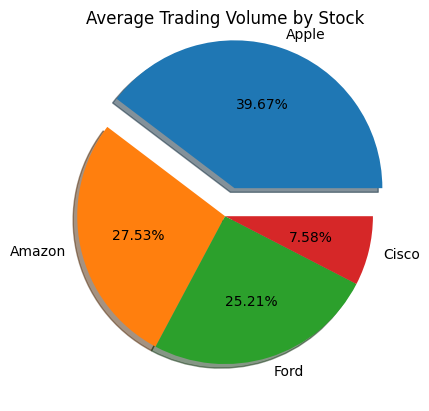

In [40]:


# --- Ensure vol_avg is a 1D array ---
# These are the example values from the project description.
# Replace them with your actual calculated averages.
aapl_vol_avg = 114461905
amzn_vol_avg = 79431532
ford_vol_avg = 72743721
csco_vol_avg = 21861895

# This creates the correct 1D array
vol_avg = np.array([aapl_vol_avg, amzn_vol_avg, ford_vol_avg, csco_vol_avg])

# --- Now, create the pie chart ---
mylabels = ["Apple", "Amazon", "Ford", "Cisco"]
myexplode = [0.2, 0, 0, 0] # To create an exploding wedge

# This line should now work without error
plt.pie(vol_avg, labels=mylabels, explode=myexplode, shadow=True, autopct="%.2f%%")

plt.title("Average Trading Volume by Stock") # It's good practice to add a title
plt.show()

**Conclusion:**

From the pie chart, we find that Apple has the highest average trade volume, followed by Amazon, Ford, and Cisco. 



### Visualize the Trade Volume Over Time

Visualize the variation in the volume of stocks traded over the given period of time with the help of a graph.

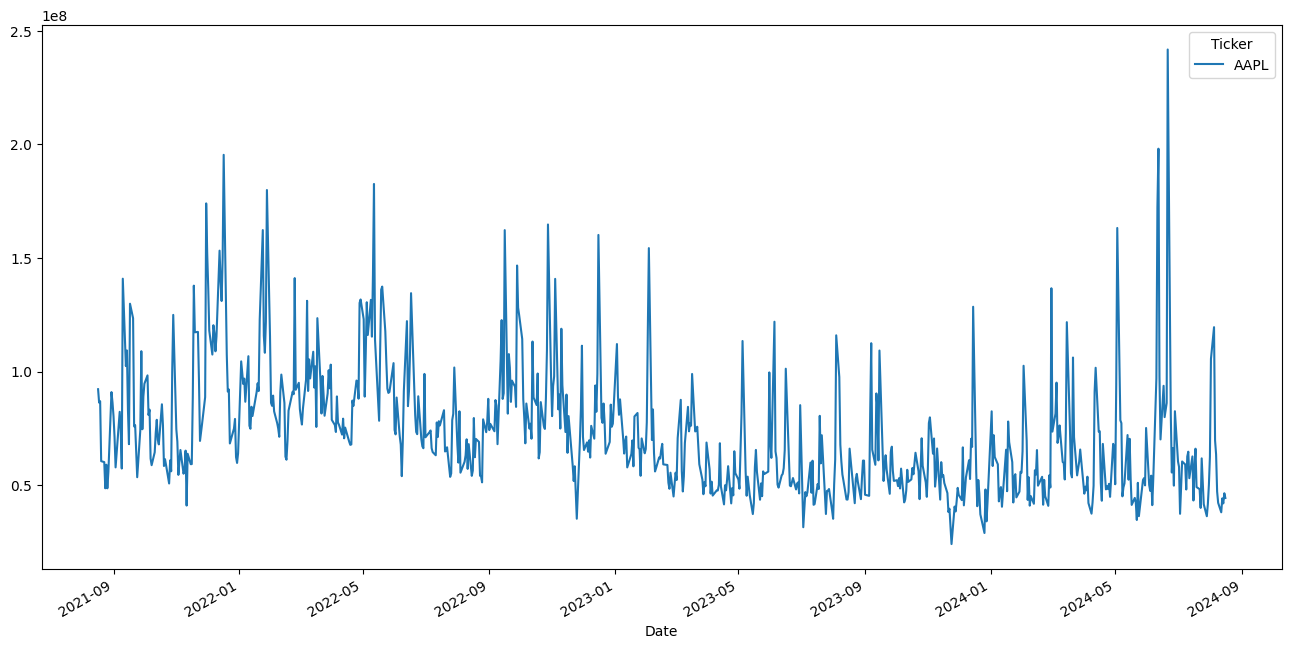

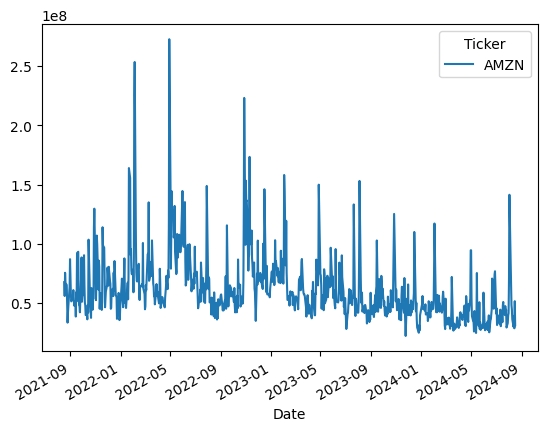

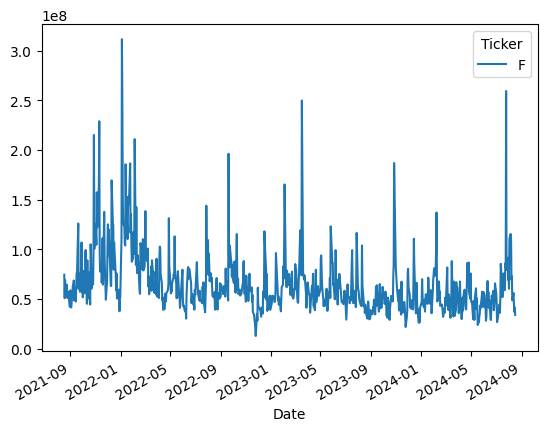

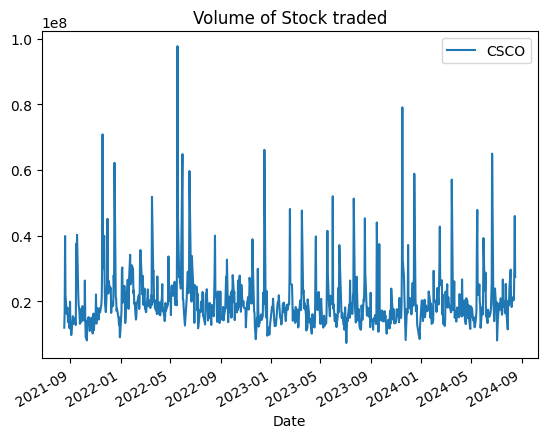

In [20]:
# Perform the visualization in a single graph

aapl['Volume'].plot(label = 'Apple', figsize = (16,8))
amzn['Volume'].plot(label = "Amazon")
ford['Volume'].plot(label = 'Ford')
csco['Volume'].plot(label = 'Cisco')

plt.title('Volume of Stock traded')
plt.legend()

**Conclusion:**

From the graph, we find that:

Apple is almost consistently traded the most, with plenty of variation in its trade volume throughout the years. Amazon and Ford come next, also with plenty of variation throughout the years, and, at times, going higher than Apple. Finally, we have Cisco with minimal variation in its trade volume, and located consistently below its 3 competitors. 

### Find the Highest Price of Stocks Traded with Time

Visualize the highest price of stocks traded with time. 


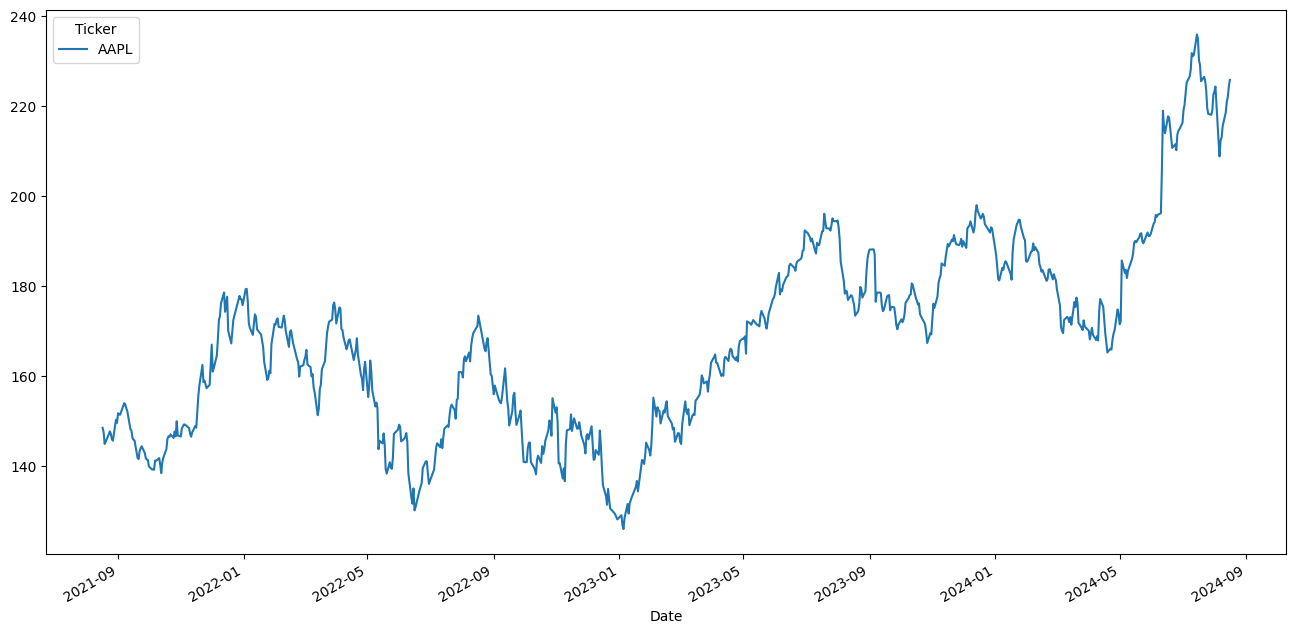

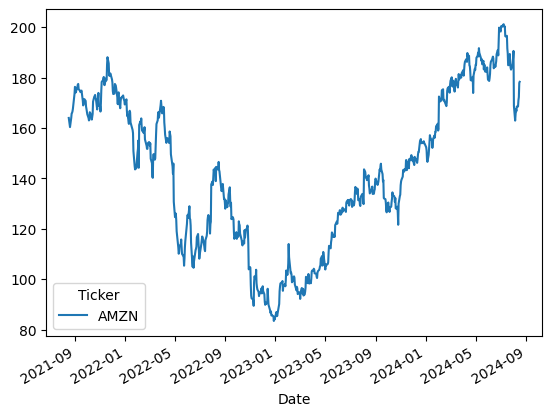

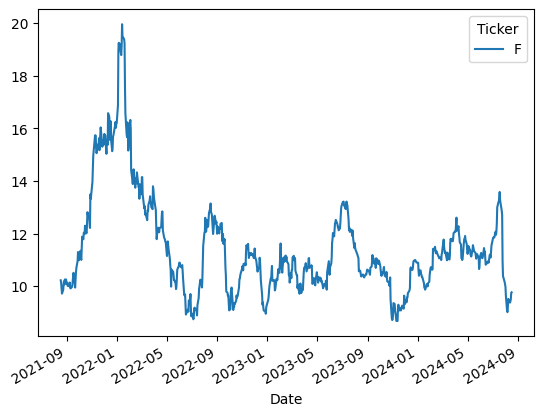

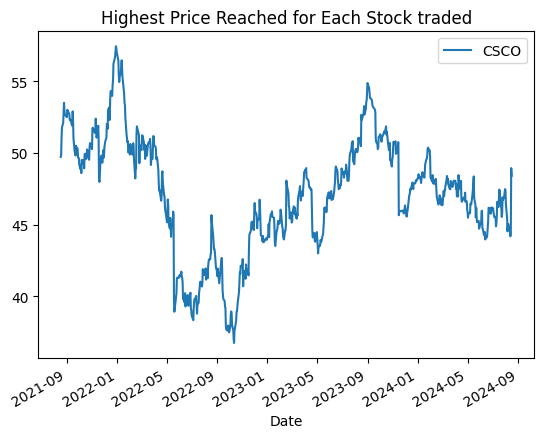

In [21]:

aapl['High'].plot(label = 'Apple', figsize = (16,8))
amzn['High'].plot(label = "Amazon")
ford['High'].plot(label = 'Ford')
csco['High'].plot(label = 'Cisco')

plt.title('Highest Price Reached for Each Stock traded')
plt.legend()

**Go through the following observations and check if they are true for your graph (assuming you are using the same stocks and time period).** 

*If you are using different data, try to come up with similar observations pertaining to your data.*

The graph shows us the highest prices that each stock has reached over time. We see that:

* Amazon has the highest price until the end of 2021, and by January 2022, the price of Amazon drops below Apple.

* Amazon and Apple show almost similar trends until the end of 2021. 

* Amazon displays mostly an increase in the highest price, with a sharp drop in price first by the end of 2021, and then before May 2022. The price begins increasing again between May and August 2022. 

* Apple displays mostly an increase in the highest price, with a sharp drop in price before May 2022. The price begins increasing again between May and August 2022.

* Ford and Cisco show almost consistent trends in the highest stock price. 

### Find the Lowest Prices of Stocks Traded with Time

Similary, visualize the lowest price of stocks traded with time. 



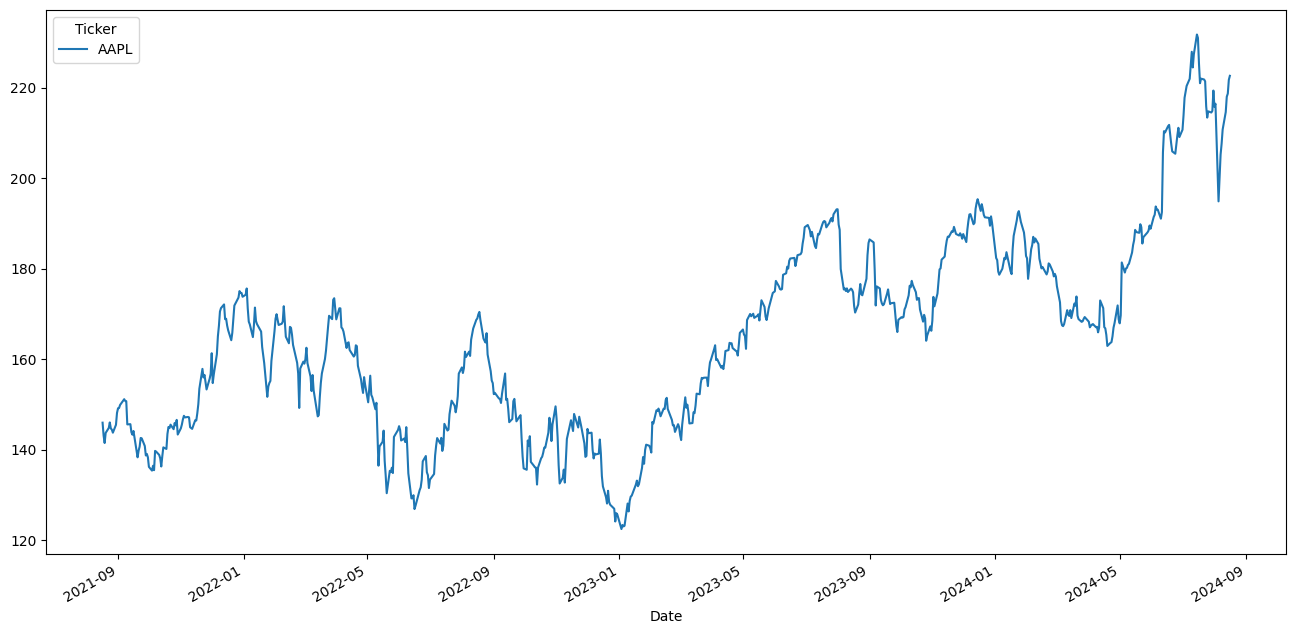

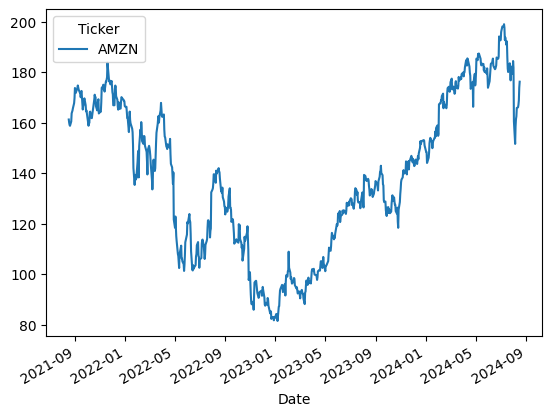

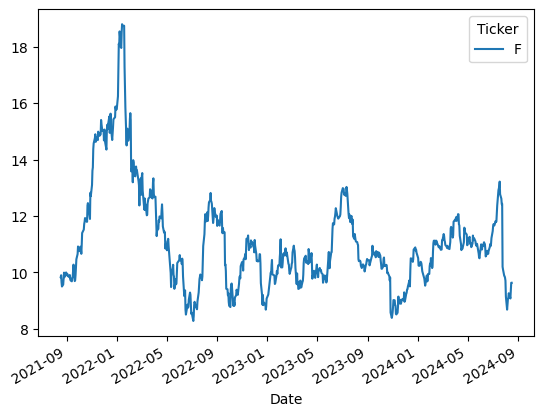

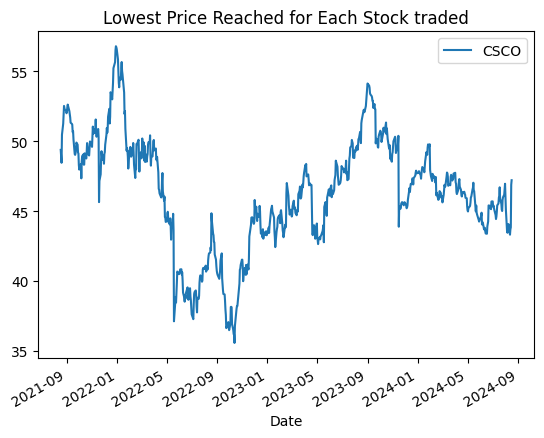

In [22]:

aapl['Low'].plot(label = 'Apple', figsize = (16,8))
amzn['Low'].plot(label = "Amazon")
ford['Low'].plot(label = 'Ford')
csco['Low'].plot(label = 'Cisco')

plt.title('Lowest Price Reached for Each Stock traded')
plt.legend()

### Find the Open Price of Stocks Traded with Time

Visualize the open price of stocks traded with time. 



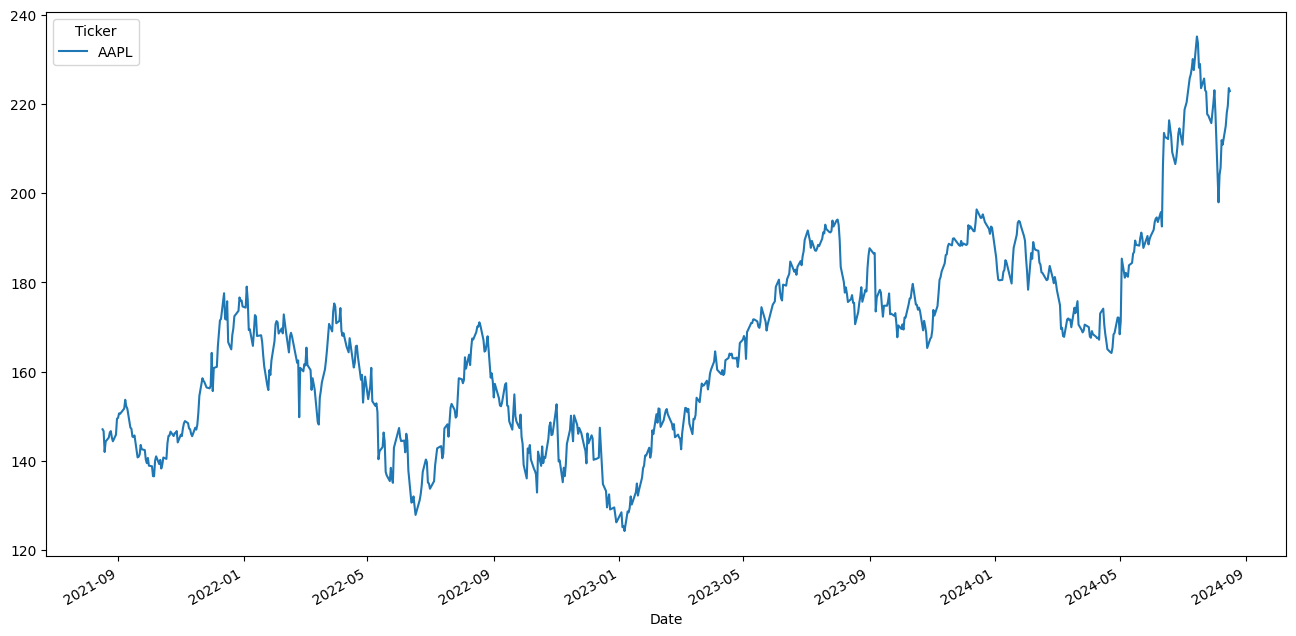

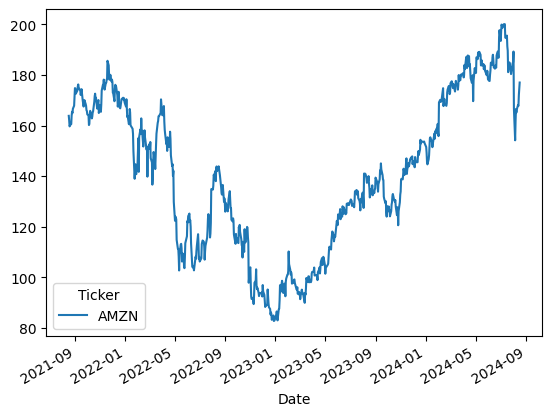

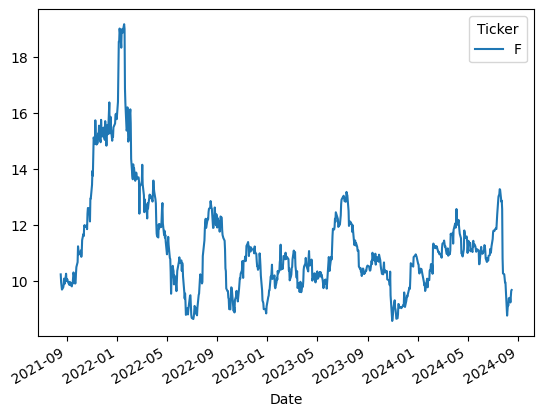

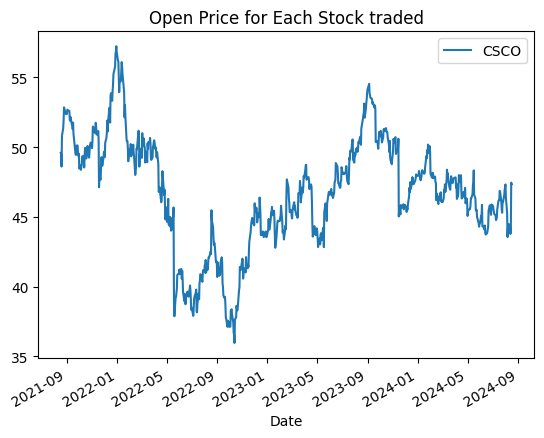

In [23]:

aapl['Open'].plot(label = 'Apple', figsize = (16,8))
amzn['Open'].plot(label = "Amazon")
ford['Open'].plot(label = 'Ford')
csco['Open'].plot(label = 'Cisco')

plt.title('Open Price for Each Stock traded')
plt.legend()

## Step 4: Market Capitalization
This gives the value of a company that is traded in the stock market. This allows investors to understand how valuable a company is perceived to be by investors. 

The size and value of a company gives the level of risk one might expect when investing in its stock, as well as how much an investment might return over time.

It is found by calculating the product of the total number of shares with the present price of shares. 

M_Cap = Total Number of Shares * Present Shares Price

### Determine the Stocks that Would Provide Lower Risk with Greater Returns Over Time

Find the market capitalization values for each of the 4 stocks and visualize the results to determine which stocks would provide a lower risk, with greater returns over time.

In [24]:
aapl['M_Cap'] = aapl['Open'] * aapl['Volume']
amzn['M_Cap'] = amzn['Open'] * amzn['Volume']
ford['M_Cap'] = ford['Open'] * ford['Volume']
csco['M_Cap'] = csco['Open'] * csco['Volume']



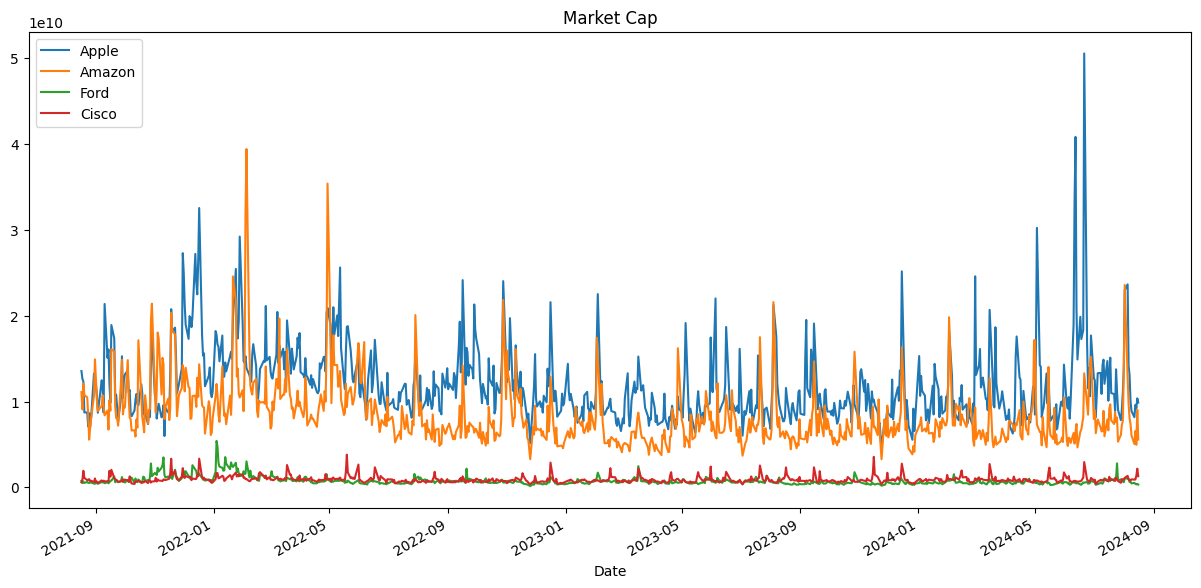

In [25]:
aapl['M_Cap'].plot(label = 'Apple', figsize = (15,7))
amzn['M_Cap'].plot(label = 'Amazon')
ford['M_Cap'].plot(label = 'Ford')
csco['M_Cap'].plot(label = 'Cisco')

plt.title('Market Cap')
plt.legend()


**Conclusion:**

Apple and Amazon are traded more compared to Cisco and Ford.

Thus, we can conclude that investing in Apple and Amazon would provide a lower risk, with greater returns over time.

## Step 5: Moving Averages
Moving Averages are used to deal with price fluctuations, since stock prices are extremely volatile and change rapidly over time. In general, an upward trend in a moving average (bull market) might imply an increase in the price or momentum of a security, while a downward trend (bear market) would be seen as a decline.

We can use the help of 50-day and 200-day averages to look for trends. The 200-day moving average is considered especially significant in stock trading. As long as the 50-day moving average of a stock price remains above the 200-day moving average, the stock is generally thought to be in a bullish trend.

### Determine the Stocks that Have Significant Upward Trends

Find the Moving Averages for each of the 4 stocks and compare them to find which stocks have significant bullish trends. 



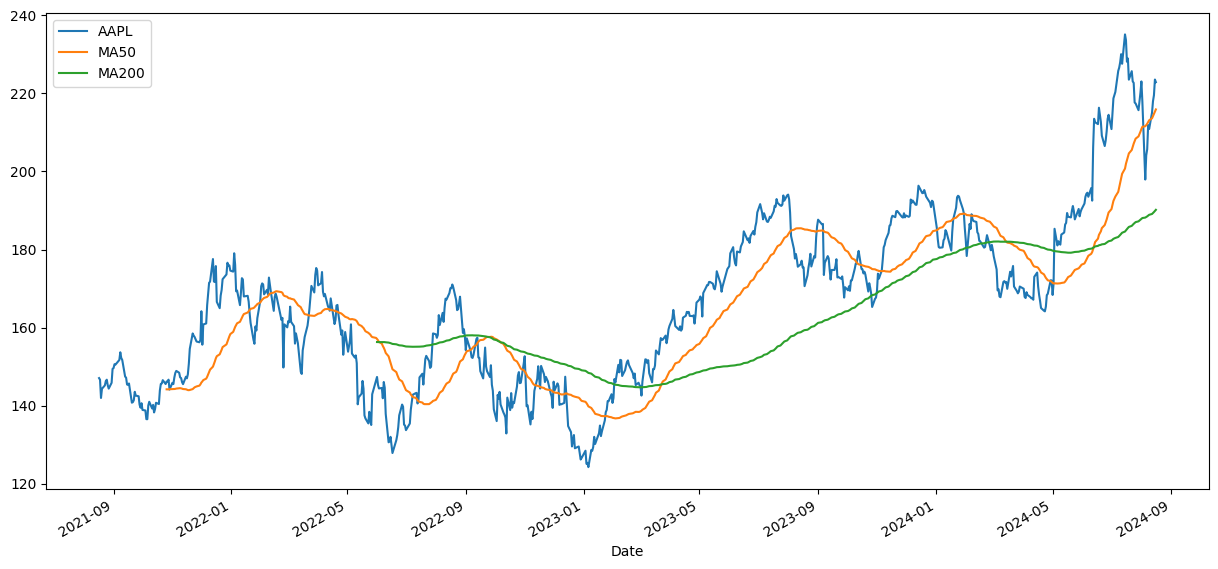

In [26]:
# Example for a single stock

aapl['MA50'] = aapl['Open'].rolling(50).mean()
aapl['MA200'] = aapl['Open'].rolling(200).mean()

# Plot

aapl['Open'].plot(figsize = (15,7))
aapl['MA50'].plot()
aapl['MA200'].plot()
plt.legend()

In [27]:
# Find the MA for all the stocks

aapl['MA50'] = aapl['Open'].rolling(50).mean()
aapl['MA200'] = aapl['Open'].rolling(200).mean()

amzn['MA50'] = amzn['Open'].rolling(50).mean()
amzn['MA200'] = amzn['Open'].rolling(200).mean()

ford['MA50'] = ford['Open'].rolling(50).mean()
ford['MA200'] = ford['Open'].rolling(200).mean()

csco['MA50'] = csco['Open'].rolling(50).mean()
csco['MA200'] = csco['Open'].rolling(200).mean()

<Axes: title={'center': 'Cisco'}, xlabel='Date'>

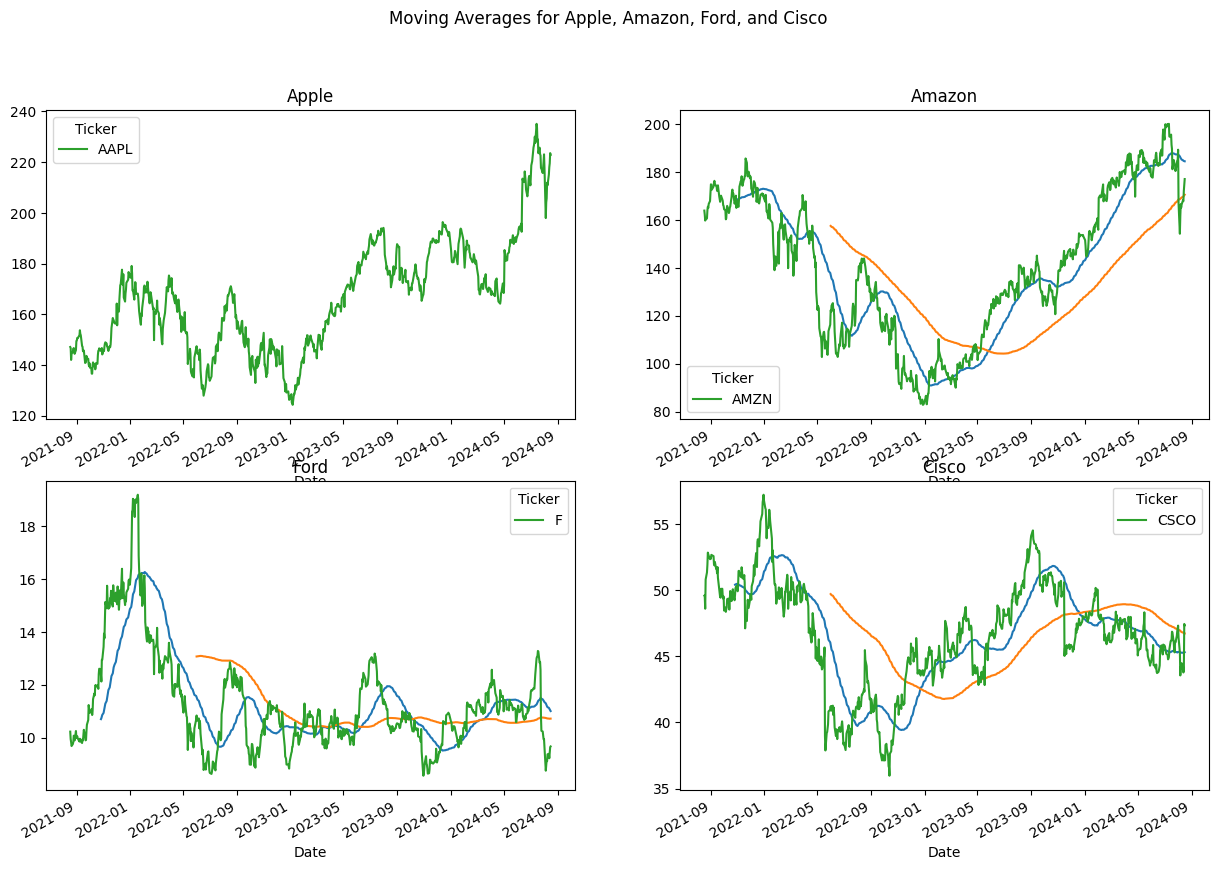

In [28]:
# Plot them together to compare them

figure, axes = plt.subplots(2, 2, figsize = (15, 10))

figure.suptitle('Moving Averages for Apple, Amazon, Ford, and Cisco')

axes[0,0].set_title('Apple')
axes[0,1].set_title('Amazon')
axes[1,0].set_title('Ford')
axes[1,1].set_title('Cisco')


aapl['MA50'].plot(ax=axes[0, 0])
aapl['MA200'].plot(ax=axes[0, 0])
aapl['Open'].plot(ax=axes[0, 0])

amzn['MA50'].plot(ax=axes[0, 1])
amzn['MA200'].plot(ax=axes[0, 1])
amzn['Open'].plot(ax=axes[0, 1])

ford['MA50'].plot(ax=axes[1, 0])
ford['MA200'].plot(ax=axes[1, 0])
ford['Open'].plot(ax=axes[1, 0])

csco['MA50'].plot(ax=axes[1, 1])
csco['MA200'].plot(ax=axes[1, 1])
csco['Open'].plot(ax=axes[1, 1])

**Conclusion:**

From the graphs, we observe that:

1. Apple has a relatively consistent upward trend, with a slight decrease towards the end before increasing again.
2. Amazon has a sharp increase, followed by a period of an almost consistent trend. There is a sharp drop towards the end before it rises again. 
3. Ford sees a short period of decrease, after which it significantly increases. At the end, it drops, and then increases again.
4. Cisco sees a very unsteady trend initially, with two sharp drops, until it finally begins to rise. At the end, it drops quite sharply, and then slowly begins to rise. 



## Step 6: Volatility and Stability

A percentage increase in stock value is the change in stock comparing that to the previous day. The bigger the value, either positive or negative, the more volatile the stock is.

The formula is:

rt =(Pt/Pt-1) -1, where,

rt = Return,
Pt = Price at time T,
Pt-1 = Price at time T-1.


Most investors fear volatility - They want stability.

With the help of histograms, we can find out whether a stock is stable or volatile. The thicker our histogram is the more volatile the stock is.

### Compare Volatility and Stability

Find and compare the volatility and stability for each of the 4 stocks and determine which stock appears to be the most volatile.

<Axes: >

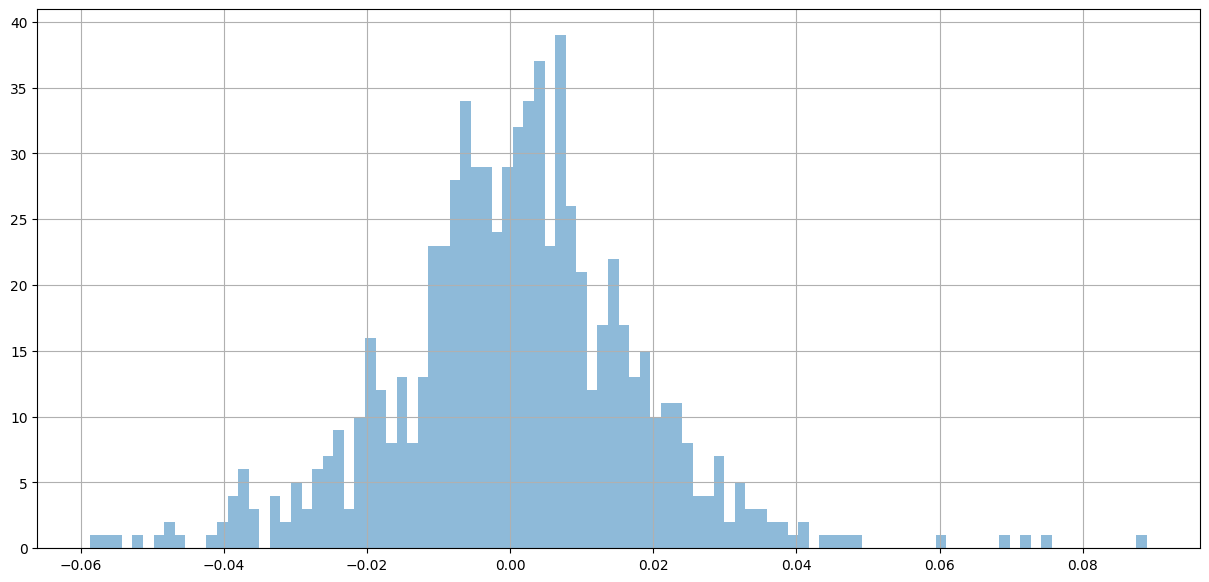

In [29]:
# Example to find the precentage increase in value for one of the stocks and then visualize it graphically.

aapl['returns'] = (aapl['Close']/aapl['Close'].shift(1)) -1
# The .shift() command in Python is used either to push all rows in a DataFrame or to use the previous row in a DataFrame.

# Plot
aapl['returns'].hist(bins = 100, label = 'Apple', alpha = 0.5, figsize = (15,7))

<Axes: title={'center': 'Cisco'}>

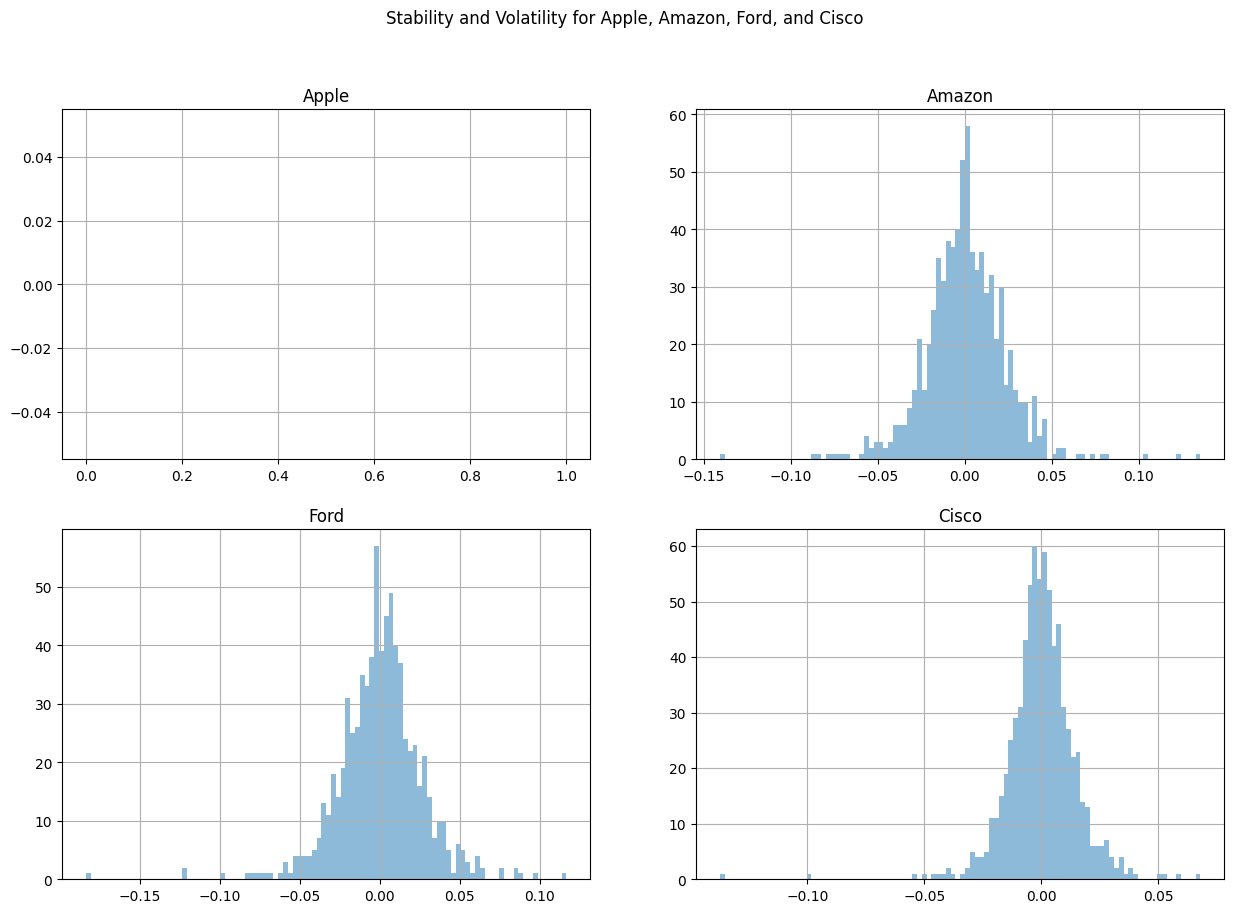

In [30]:
# Finding the volatility / stability for each of the stocks.

aapl['returns'] = (aapl['Close']/aapl['Close'].shift(1)) -1
amzn['returns'] = (amzn['Close']/amzn['Close'].shift(1)) -1
ford['returns'] = (ford['Close']/ford['Close'].shift(1)) -1
csco['returns'] = (csco['Close']/csco['Close'].shift(1)) -1


# Visualize the results.

figure, axes = plt.subplots(2, 2, figsize = (15, 10))

figure.suptitle('Stability and Volatility for Apple, Amazon, Ford, and Cisco')

axes[0,0].set_title('Apple')
axes[0,1].set_title('Amazon')
axes[1,0].set_title('Ford')
axes[1,1].set_title('Cisco')

aapl['returns'].hist(bins = 100, label = 'Apple', alpha = 0.5, ax=axes[0, 0])

amzn['returns'].hist(bins = 100, label = 'Amazon', alpha = 0.5, ax=axes[0, 1])

ford['returns'].hist(bins = 100, label = 'Ford', alpha = 0.5, ax=axes[1, 0])

csco['returns'].hist(bins = 100, label = 'Cisco', alpha = 0.5, ax=axes[1, 1])

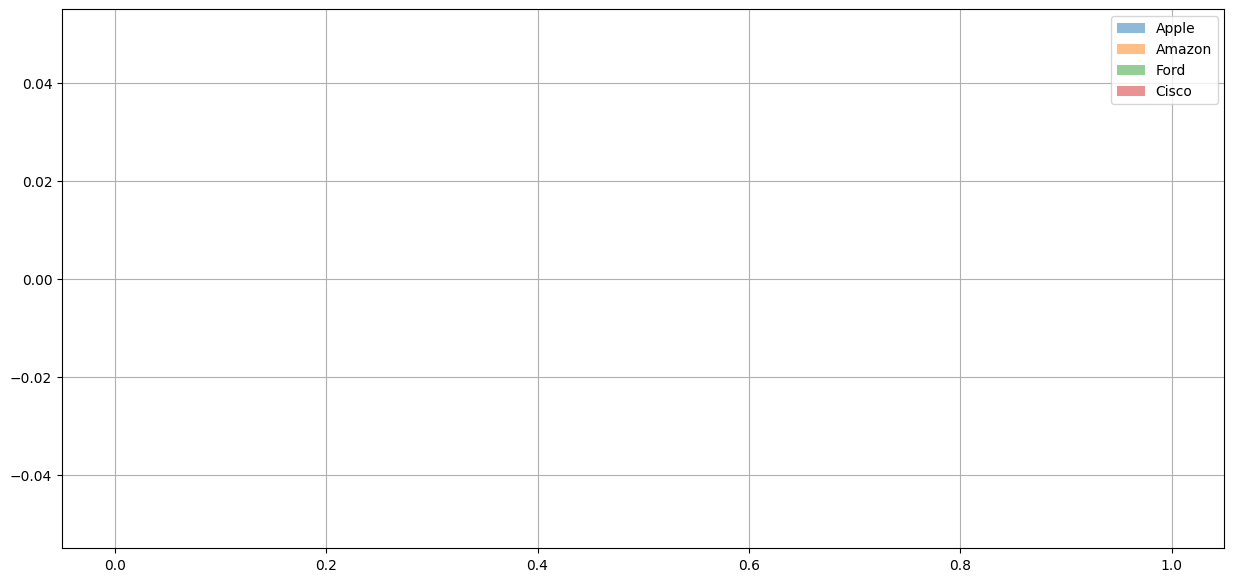

In [31]:
# Comparing the volatility / stability for all the stocks.


aapl['returns'] = (aapl['Close']/aapl['Close'].shift(1)) -1
amzn['returns'] = (amzn['Close']/amzn['Close'].shift(1))-1
ford['returns'] = (ford['Close']/ford['Close'].shift(1)) - 1
csco['returns'] = (csco['Close']/csco['Close'].shift(1)) - 1

aapl['returns'].hist(bins = 100, label = 'Apple', alpha = 0.5, figsize = (15,7))
amzn['returns'].hist(bins = 100, label = 'Amazon', alpha = 0.5)
ford['returns'].hist(bins = 100, label = 'Ford', alpha = 0.5)
csco['returns'].hist(bins = 100, label = 'Cisco', alpha = 0.5)

plt.legend()

**Conclusion:**

From the graphs, we can see that Ford appears to be the most volatile stock, as it has a thicker histogram.



## Step 7: Correlations

### Create Correlation Tables

Find correlations between each variable of the dataframe with the help of a correlation table.


In [32]:
# Correlation table for Stock 1

aapl_corr = aapl.corr()
aapl_corr

,Price,Close,High,Low,Open,Volume,M_Cap,MA50,MA200,returns
,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,
Price,Ticker,,,,,,,,,
Close,AAPL,1.000000,0.997475,0.997419,0.994073,-0.312051,0.021547,NaN,NaN,NaN
High,AAPL,0.997475,1.000000,0.996975,0.997275,-0.288087,0.047969,NaN,NaN,NaN
Low,AAPL,0.997419,0.996975,1.000000,0.997688,-0.336677,-0.002150,NaN,NaN,NaN
Open,AAPL,0.994073,0.997275,0.997688,1.000000,-0.315745,0.019652,NaN,NaN,NaN
Volume,AAPL,-0.312051,-0.288087,-0.336677,-0.315745,1.000000,0.933727,NaN,NaN,NaN
M_Cap,,0.021547,0.047969,-0.002150,0.019652,0.933727,1.000000,NaN,NaN,NaN
MA50,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MA200,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Correlation table for Stock 2

amzn_corr = amzn.corr()
amzn_corr

,Price,Close,High,Low,Open,Volume,M_Cap,MA50,MA200,returns
,Ticker,AMZN,AMZN,AMZN,AMZN,AMZN,,,,
Price,Ticker,,,,,,,,,
Close,AMZN,1.000000,0.998601,0.998699,0.996834,-0.333193,0.154358,0.915536,0.608172,NaN
High,AMZN,0.998601,1.000000,0.998614,0.998823,-0.318573,0.170712,0.921214,0.615792,NaN
Low,AMZN,0.998699,0.998614,1.000000,0.998659,-0.348110,0.139443,0.912399,0.601754,NaN
Open,AMZN,0.996834,0.998823,0.998659,1.000000,-0.332391,0.156652,0.918472,0.609925,NaN
Volume,AMZN,-0.333193,-0.318573,-0.348110,-0.332391,1.000000,0.858914,-0.179180,-0.155237,NaN
M_Cap,,0.154358,0.170712,0.139443,0.156652,0.858914,1.000000,0.252231,0.152403,NaN
MA50,,0.915536,0.921214,0.912399,0.918472,-0.179180,0.252231,1.000000,0.729598,NaN
MA200,,0.608172,0.615792,0.601754,0.609925,-0.155237,0.152403,0.729598,1.000000,NaN


In [34]:
# Correlation table for Stock 3

ford_corr = ford.corr()
ford_corr

,Price,Close,High,Low,Open,Volume,M_Cap,MA50,MA200,returns
,Ticker,F,F,F,F,F,,,,
Price,Ticker,,,,,,,,,
Close,F,1.000000,0.996288,0.996497,0.991455,0.430416,0.672328,0.716504,-0.084686,NaN
High,F,0.996288,1.000000,0.996010,0.996508,0.461348,0.698422,0.728298,-0.071338,NaN
Low,F,0.996497,0.996010,1.000000,0.995874,0.403107,0.650416,0.713822,-0.101117,NaN
Open,F,0.991455,0.996508,0.995874,1.000000,0.436361,0.677049,0.726224,-0.086437,NaN
Volume,F,0.430416,0.461348,0.403107,0.436361,1.000000,0.939114,0.388217,0.099755,NaN
M_Cap,,0.672328,0.698422,0.650416,0.677049,0.939114,1.000000,0.542378,0.081255,NaN
MA50,,0.716504,0.728298,0.713822,0.726224,0.388217,0.542378,1.000000,-0.016483,NaN
MA200,,-0.084686,-0.071338,-0.101117,-0.086437,0.099755,0.081255,-0.016483,1.000000,NaN


In [35]:
# Correlation table for Stock 4

csco_corr = csco.corr()
csco_corr

,Price,Close,High,Low,Open,Volume,M_Cap,MA50,MA200,returns
,Ticker,CSCO,CSCO,CSCO,CSCO,CSCO,,,,
Price,Ticker,,,,,,,,,
Close,CSCO,1.000000,0.996167,0.996407,0.991587,-0.092362,0.109330,0.812219,0.089192,NaN
High,CSCO,0.996167,1.000000,0.995869,0.996339,-0.072901,0.129931,0.817336,0.088985,NaN
Low,CSCO,0.996407,0.995869,1.000000,0.996261,-0.116306,0.086274,0.807969,0.097387,NaN
Open,CSCO,0.991587,0.996339,0.996261,1.000000,-0.095650,0.107792,0.813711,0.094422,NaN
Volume,CSCO,-0.092362,-0.072901,-0.116306,-0.095650,1.000000,0.974872,0.051077,0.061551,NaN
M_Cap,,0.109330,0.129931,0.086274,0.107792,0.974872,1.000000,0.209485,0.075883,NaN
MA50,,0.812219,0.817336,0.807969,0.813711,0.051077,0.209485,1.000000,0.375712,NaN
MA200,,0.089192,0.088985,0.097387,0.094422,0.061551,0.075883,0.375712,1.000000,NaN


### Generate Heatmaps

Visualize the correlations with heatmaps.


Note down your observations.

<Axes: xlabel='Price-Ticker', ylabel='Price-Ticker'>

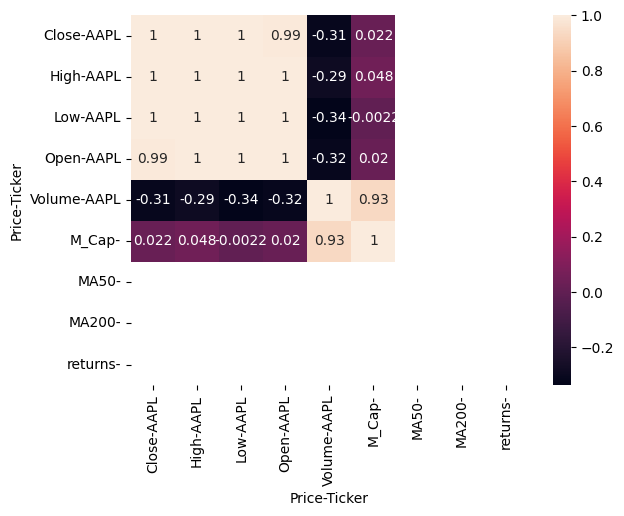

In [36]:
# Heatmap for Stock 1

sns.heatmap(aapl_corr, annot=True)


<Axes: xlabel='Price-Ticker', ylabel='Price-Ticker'>

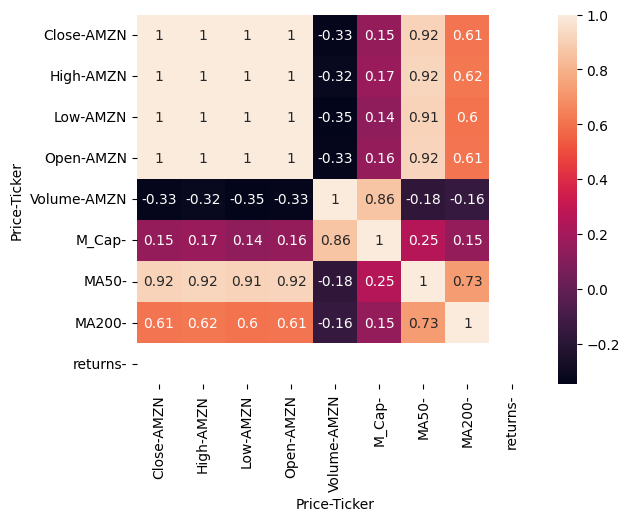

In [37]:
# Heatmap for Stock 2

sns.heatmap(amzn_corr, annot=True)


<Axes: xlabel='Price-Ticker', ylabel='Price-Ticker'>

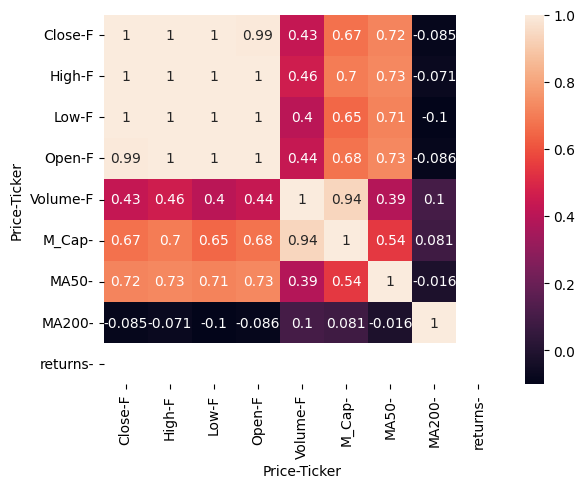

In [38]:
# Heatmap for Stock 3

sns.heatmap(ford_corr, annot=True)


<Axes: xlabel='Price-Ticker', ylabel='Price-Ticker'>

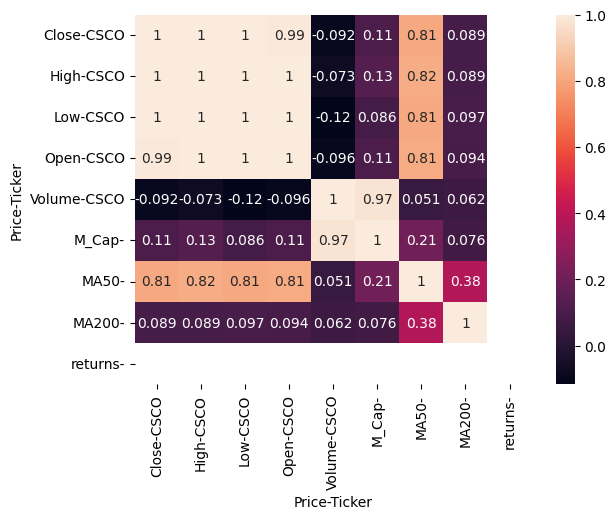

In [39]:
# Heatmap for Stock 4

sns.heatmap(csco_corr, annot=True)


**Conclusion:**

From the heatmaps, we find that for Apple, Amazon, and Cisco, Volume is negatively correlated to Open, High, Low, Close, and Adj Close.

For Ford, Volume is positively correlated to Open, High, Low, Close, and Adj Close.

## Step 8: Final Conclusion of the Analysis

From our analysis, we can conclude that among the four stocks that we have chosen, Apple might be a better option for stock trading.